In [1]:
from six.moves import cPickle as pickle
from helper import getMRCTdir, cropPatches

## Read the path for the MR and CT data

In [2]:
Path_Nonrigid = '../Data/14patient_Nonrigid_40x128x128'
Path_rigid = '../Data/3D_40x128x128'

In [3]:
lstMR_non,lstCT_non = getMRCTdir(Path_Nonrigid)
lstMR,lstCT = getMRCTdir(Path_rigid)

In [4]:
lstCT_non[:2]
lstCT[:2]

['../Data/14patient_Nonrigid_40x128x128/Pt_001_CT_SubVolume128x128x40_NonRigid.dcm',
 '../Data/14patient_Nonrigid_40x128x128/Pt_002_CT_SubVolume128x128x40_NonRigid.dcm']

['../Data/3D_40x128x128/Pt_001_CT_Resampled_SubVolume128x128x40.dcm',
 '../Data/3D_40x128x128/Pt_002_CT_Resampled_SubVolume128x128x40.dcm']

Let's try to crop the MR for the patient_001

In [5]:
crop_MR_patient01, MR_patient001 = cropPatches(lstMR[0])

In [6]:
crop_MR_patient01.shape, MR_patient001.shape

((3645, 24, 24, 24), (40, 128, 128))

## Generate MR and CT patches for all patients

In [7]:
import numpy as np
cropMR = np.vstack([cropPatches(s)[0] for s in lstMR])

In [8]:
cropCT = np.vstack([cropPatches(s)[0] for s in lstCT])

In [9]:
cropMR.shape, cropCT.shape

((51030, 24, 24, 24), (51030, 24, 24, 24))

## Save the patches

In [13]:
pickle_file = '../Data/Exp14_128/MRICT_patch_%d_%d.pickle' %(cropMR.shape[1], cropCT.shape[1])

In [14]:
try:
    f = open(pickle_file,'wb')
    save = {
        'MRI': cropMR,
        'CT': cropCT,
        'num_patients':len(lstMR),
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)

## Compare rigid registration and non-rigid registration

In [15]:
MR_data = np.vstack([cropPatches(s)[1] for s in lstMR])
MR_non_data = np.vstack([cropPatches(s)[1] for s in lstMR_non])
CT_data = np.vstack([cropPatches(s)[1] for s in lstCT])
CT_non_data = np.vstack([cropPatches(s)[1] for s in lstCT_non])

In [16]:
MR_data.shape, MR_non_data.shape

((560, 128, 128), (560, 128, 128))

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

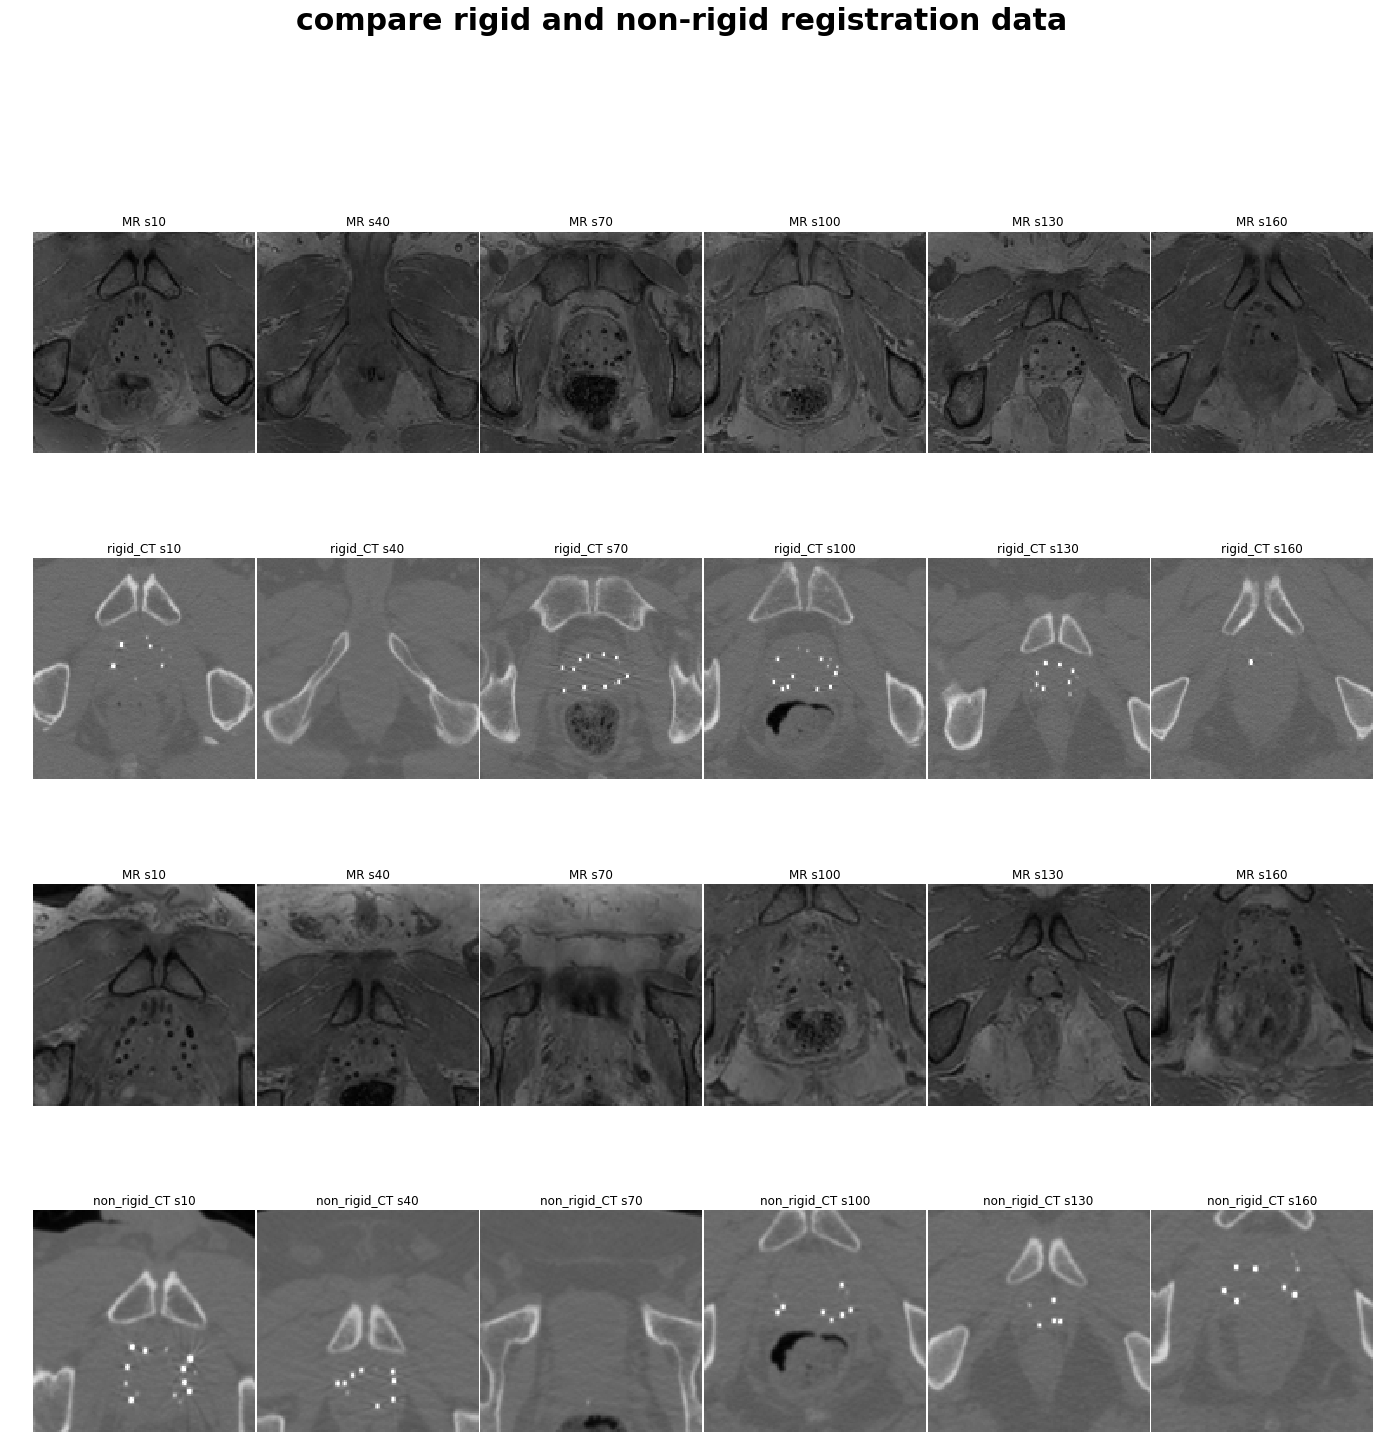

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# norm = mcolors.NoNorm()

norm_ct = mcolors.Normalize(vmax = np.max(np.maximum(MR_data, MR_non_data)), 
                            vmin = np.min(np.minimum(MR_data, MR_non_data)))
norm_mr = mcolors.Normalize(vmax = np.max(np.maximum(MR_data, MR_non_data)), 
                            vmin = np.min(np.minimum(MR_data, MR_non_data)))
fig,ax = plt.subplots(4,6,figsize = [24,24])
for i in range(6):
    step = 30
    ind = 10 + i*step
    ax[0,i].set_title('MR s%d' % ind)
    ax[0,i].imshow(MR_data[ind,:,:],cmap='gray', norm = norm_mr)
    ax[0,i].axis('off')
    ax[1,i].set_title('rigid_CT s%d' % ind)
    ax[1,i].imshow(CT_data[ind,:,:],cmap='gray', norm = norm_ct)
    ax[1,i].axis('off')
    ax[2,i].set_title('MR s%d' % ind)
    ax[2,i].imshow(MR_non_data[ind,:,:],cmap='gray',norm = norm_mr)
    ax[2,i].axis('off')
    ax[3,i].set_title('non_rigid_CT s%d' % ind)
    ax[3,i].imshow(CT_non_data[ind,:,:],cmap='gray',norm = norm_ct)
    ax[3,i].axis('off')
fig.suptitle('compare rigid and non-rigid registration data', fontsize=30, fontweight='bold')
plt.subplots_adjust(wspace=0.01,hspace=0)
plt.savefig('non-rigid and rigid registration')

## histogram of CT for patient001

In [18]:
CT_data.shape

(560, 128, 128)

In [19]:
flatten = CT_data[:40,:,:].astype(np.float64).flatten()

In [20]:
flatten.shape

(655360,)

(array([  1.50000000e+01,   2.90000000e+01,   1.40000000e+01,
          1.80000000e+01,   1.50000000e+01,   6.00000000e+00,
          1.40000000e+01,   1.20000000e+01,   8.00000000e+00,
          7.00000000e+00,   1.10000000e+01,   1.70000000e+01,
          1.40000000e+01,   2.20000000e+01,   2.10000000e+01,
          2.50000000e+01,   2.70000000e+01,   3.90000000e+01,
          8.50000000e+01,   2.82000000e+02,   2.97400000e+03,
          1.93580000e+04,   3.61680000e+04,   7.08390000e+04,
          1.47508000e+05,   1.96697000e+05,   8.08970000e+04,
          2.00930000e+04,   1.17250000e+04,   8.83600000e+03,
          7.38800000e+03,   6.19800000e+03,   5.46600000e+03,
          4.63200000e+03,   4.25100000e+03,   3.73100000e+03,
          3.56500000e+03,   3.08500000e+03,   3.06900000e+03,
          2.57400000e+03,   2.37200000e+03,   1.99300000e+03,
          1.86100000e+03,   1.62600000e+03,   1.50600000e+03,
          1.21100000e+03,   1.12800000e+03,   9.37000000e+02,
        

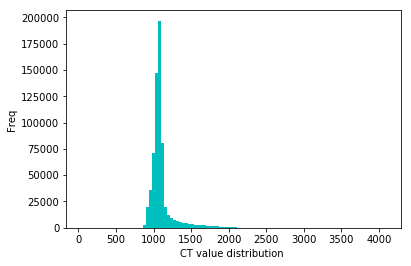

In [21]:
%matplotlib inline
plt.hist(flatten, bins = 100 , color ='c')
plt.xlabel('CT value distribution ')
plt.ylabel('Freq')
plt.show()